In [1]:
import pandas as pd
from matplotlib.pyplot import hist
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.ExcelFile("CC-3Y-Transactions.xlsx")

In [3]:
df = pd.read_excel('CC-3Y-Transactions.xlsx')

In [4]:
#Business rule for detecting fraud
#Fuel expenses over 100000 are can be considered as fraud transactions
#filtering fuel expenses
df2 = df.loc[df['Exp Type'] == "Fuel"]
df3 = df2.loc[df['Amount'] > 100000]
df3.sort_values('Date')
df3.set_index('Date', inplace=True)
df3

,City,Card Type,Exp Type,Gender,Amount
Date,,,,,
2014-05-06,"Bengaluru, India",Silver,Fuel,F,194493
2014-12-27,"Greater Mumbai, India",Silver,Fuel,F,249400
2014-12-18,"Greater Mumbai, India",Silver,Fuel,F,239856
2014-10-16,"Greater Mumbai, India",Silver,Fuel,F,273374
2014-08-03,"Bengaluru, India",Silver,Fuel,F,251295
...,...,...,...,...,...
2014-09-07,"Lucknow, India",Platinum,Fuel,M,128590
2014-01-21,"Hyderabad, India",Platinum,Fuel,M,178594
2014-07-06,"Surat, India",Platinum,Fuel,F,111182


In [5]:
#Business rule for detecting fraud
#Expenses over 100000 per transaction on food are considered as fraud
#filtering food expenses
df4 = df.loc[df['Exp Type'] == "Food"]
df5 = df4.loc[df['Amount'] > 100000]
df5.sort_values('Date')
df5.set_index('Date', inplace=True)
df5

,City,Card Type,Exp Type,Gender,Amount
Date,,,,,
2014-11-20,"Greater Mumbai, India",Silver,Food,F,193429
2014-03-08,"Bengaluru, India",Silver,Food,F,222579
2015-03-19,"Bengaluru, India",Platinum,Food,F,194846
2015-02-08,"Greater Mumbai, India",Signature,Food,F,225614
2015-02-04,"Ahmedabad, India",Gold,Food,F,279579
...,...,...,...,...,...
2014-01-18,"Surat, India",Silver,Food,M,271349
2014-12-30,"Pune, India",Silver,Food,F,105736
2014-04-21,"Kanpur, India",Platinum,Food,F,250805


In [6]:
#Business rule for detecting fraud
#Expenses over 100000 per transaction on grocery are considered as fraud
#filtering grocery expenses
df6 = df.loc[df['Exp Type'] == "Grocery"]
df7 = df6.loc[df['Amount'] > 100000]
df7.sort_values('Date')
df7.set_index('Date', inplace=True)
df7

,City,Card Type,Exp Type,Gender,Amount
Date,,,,,
2014-05-25,"Delhi, India",Silver,Grocery,F,213000
2013-12-08,"Greater Mumbai, India",Silver,Grocery,F,183633
2013-11-02,"Ahmedabad, India",Silver,Grocery,F,171803
2015-05-05,"Delhi, India",Silver,Grocery,F,177579
2014-05-01,"Greater Mumbai, India",Silver,Grocery,F,230362
...,...,...,...,...,...
2014-06-09,"Kanpur, India",Silver,Grocery,M,299052
2014-07-15,"Kolkata, India",Silver,Grocery,F,244334
2014-06-04,"Lucknow, India",Gold,Grocery,F,279603


In [7]:
#Business rule for detecting fraud
#Expenses over 100000 per transaction on bills are considered as fraud
#filtering bills expenses
df8 = df.loc[df['Exp Type'] == "Bills"]
df9 = df8.loc[df['Amount'] > 100000]
df9.sort_values('Date')
df9.set_index('Date', inplace=True)
df9

,City,Card Type,Exp Type,Gender,Amount
Date,,,,,
2014-08-27,"Bengaluru, India",Silver,Bills,F,101738
2014-04-12,"Greater Mumbai, India",Signature,Bills,F,123424
2015-05-05,"Bengaluru, India",Gold,Bills,F,171574
2014-09-08,"Delhi, India",Silver,Bills,F,100036
2015-02-24,"Delhi, India",Gold,Bills,F,143250
...,...,...,...,...,...
2013-12-23,"Hyderabad, India",Signature,Bills,F,118648
2014-03-25,"Pune, India",Signature,Bills,F,196655
2014-11-27,"Surat, India",Gold,Bills,M,186860


In [8]:
df10 =pd.read_excel('CC-3Y-Transactions.xlsx', parse_dates=['Date'])

<AxesSubplot:xlabel='Date'>

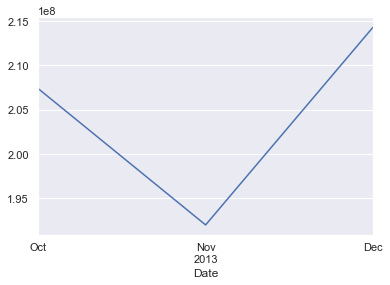

In [9]:
#Analysis of total amounting transactions for year 2013
filt = (df10['Date'] >= '2013') & (df10['Date'] < '2014')
yr13 = df10.loc[filt]
yr13.set_index('Date', inplace=True)
yr13['Amount'].resample('M').sum()
monthly_yr13 = yr13['Amount'].resample('M').sum()
sns.set()
monthly_yr13.plot()

<AxesSubplot:xlabel='Exp Type', ylabel='Amount'>

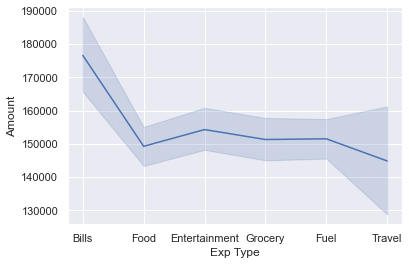

In [10]:
#Expenses analysis for year 2013
filt = (df10['Date'] >= '2013') & (df10['Date'] < '2014')
yr13 = df10.loc[filt]
sns.lineplot(x='Exp Type', y='Amount', data=yr13)

<AxesSubplot:xlabel='Card Type', ylabel='Amount'>

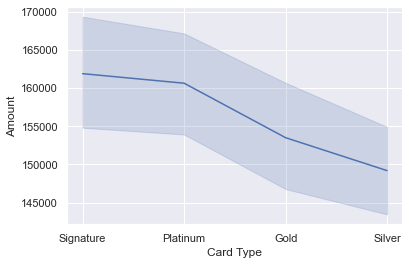

In [11]:
#Transactions analysis by type of card for year 2013
sns.lineplot(x='Card Type', y='Amount', data=yr13)

In [12]:
#Top-5 Cities-expenses-year1(2013)
filt = (df10['Date'] >= '2013') & (df10['Date'] < '2014')
yr13 = df10.loc[filt]
yr13
rep_yr13 = yr13.sort_values(by='Amount', ascending=False)
rep_yr131 = rep_yr13.drop_duplicates(subset='City', keep='first')
report1_2013 = rep_yr131.head()
report1_2013.set_index('City', inplace=True)
t20 = report1_2013.T
t21 = t20.drop(index=['Date', 'Card Type', 'Exp Type', 'Gender'])
t21

City,"Delhi, India","Greater Mumbai, India","Bengaluru, India","Ahmedabad, India","Sonepur, India"
Amount,996754,990700,973026,892016,299905


<AxesSubplot:xlabel='Amount', ylabel='City'>

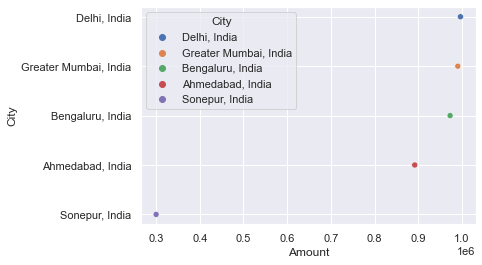

In [13]:
#Top5-cities-2013-chart
sns.set()
sns.scatterplot(x='Amount', y='City', hue='City', data=report1_2013)

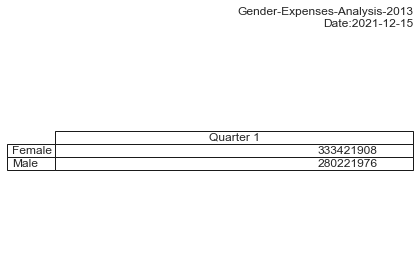

In [14]:
#Gender-Expenses-Analysis-2013
filt = (df10['Date'] >= '2013') & (df10['Date'] < '2014')
yr13 = df10.loc[filt]
female13 = yr13.loc[yr13['Gender'] == 'F']
male13 = yr13.loc[yr13['Gender']=='M']
newm13 = male13.rename(columns={"Amount": "male"})
female13.set_index('Date', inplace=True)
newm13.set_index('Date', inplace=True)
female13['Amount'].resample('Q').sum()
quarterly_ma_13 = newm13['male'].resample('Q').sum()
quarterly_fe_13 = female13['Amount'].resample('Q').sum()
frames = [quarterly_fe_13, quarterly_ma_13]
pd.concat(frames, axis=1)
#report2_2013
report2_2013 = pd.concat(frames, axis=1)
report2_2013.rename(columns={"Amount": "Female", "male": "Male"})
df30 = report2_2013.rename(columns={"Amount": "Female", "male": "Male"})
df32 = df30.reset_index()
df33 = df32.rename(index = {0:"Quarter 1", 1:"Quarter 2", 2:"Quarter 3", 3:"Quarter 4"}).T
df34 = df33.drop(index=['Date'])
df31 = pd.DataFrame(df34)
fig, ax =plt.subplots(1,1)
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
date = str(datetime.date(datetime.now()))
ax.set_title('Gender-Expenses-Analysis-2013'+'\nDate:'+ date, loc='right')
table = ax.table(cellText=df31.values, rowLabels=df31.index, colLabels=df31.columns, loc='center')
fig.tight_layout()
fig=ax.get_figure()

<AxesSubplot:xlabel='Date'>

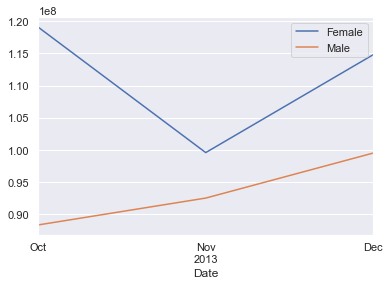

In [15]:
#Gender-Expenses-Analysis-2013-chart
filt = (df10['Date'] >= '2013') & (df10['Date'] < '2014')
yr13 = df10.loc[filt]
female132 = yr13.loc[yr13['Gender'] == 'F']
male132 = yr13.loc[yr13['Gender']=='M']
newm132 = male132.rename(columns={"Amount": "male"})
female132.set_index('Date', inplace=True)
newm132.set_index('Date', inplace=True)
quarterly_ma_132 = newm132['male'].resample('M').sum()
quarterly_fe_132 = female132['Amount'].resample('M').sum()
frames = [quarterly_fe_132, quarterly_ma_132]
pd.concat(frames, axis=1)
#report2_2013
report2_20132 = pd.concat(frames, axis=1)
report2_20132.rename(columns={"Amount": "Female", "male": "Male"})
df40 = report2_20132.rename(columns={"Amount": "Female", "male": "Male"})
sns.set()
df40.plot()

In [16]:
#Top-3 expenses-analysis-year1(2013)
yr13
rep313 = yr13.sort_values(by='Amount', ascending=False)
rep3_yr13 = rep313.drop_duplicates(subset='Exp Type', keep='first')
report3_2013 = rep3_yr13.head(3)
report3_2013.set_index('Exp Type', inplace=True)
t30 = report3_2013.T
t31 = t30.drop(index=['Date', 'Card Type', 'City', 'Gender'])
t31

Exp Type,Bills,Fuel,Entertainment
Amount,996754,299905,299794


<AxesSubplot:xlabel='Amount', ylabel='Exp Type'>

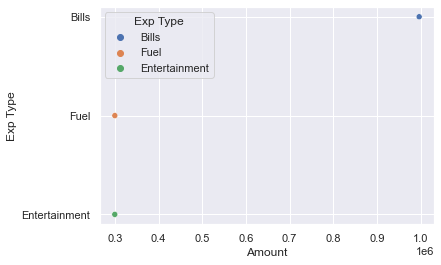

In [17]:
#Top-3 expenses-analysis-year2(2013)-chart
sns.scatterplot(x='Amount', y='Exp Type', hue='Exp Type', data=report3_2013)

<AxesSubplot:xlabel='Date'>

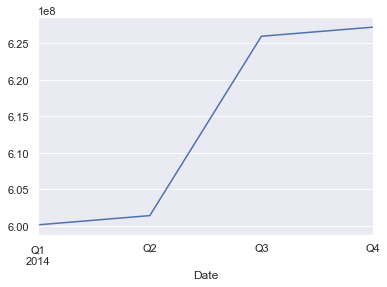

In [18]:
#Quarterly analysis of total amounting transactions for 2014
filt = (df10['Date'] >= '2014') & (df10['Date'] < '2015')
yr14 = df10.loc[filt]
yr14.set_index('Date', inplace=True)
yr14['Amount'].resample('Q').sum()
quarterly_yr14 = yr14['Amount'].resample('Q').sum()
sns.set()
quarterly_yr14.plot()

<AxesSubplot:xlabel='Exp Type', ylabel='Amount'>

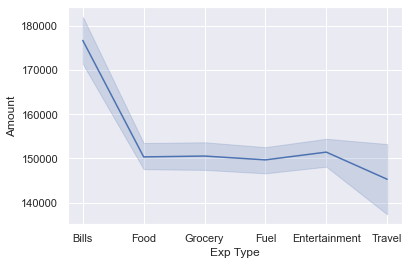

In [19]:
#Expenses analysis for year 2014
filt = (df10['Date'] >= '2014') & (df10['Date'] < '2015')
yr14 = df10.loc[filt]
sns.lineplot(x='Exp Type', y='Amount', data=yr14)

<AxesSubplot:xlabel='Card Type', ylabel='Amount'>

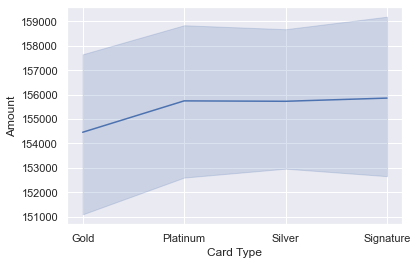

In [20]:
#Transactions analysis by type of card for year 2014
sns.lineplot(x='Card Type', y='Amount', data=yr14)

In [21]:
#Top-5 Cities-expenses-report1-year2(2014)
filt = (df10['Date'] >= '2014') & (df10['Date'] < '2015')
yr14 = df10.loc[filt]
yr14
rep_yr14 = yr14.sort_values(by='Amount', ascending=False)
rep_yr141 = rep_yr14.drop_duplicates(subset='City', keep='first')
report1_2014 = rep_yr141.head()
report1_2014.set_index('City', inplace=True)
t14 = report1_2014.T
t15 = t14.drop(index=['Date', 'Card Type', 'Exp Type', 'Gender'])
t15

City,"Greater Mumbai, India","Ahmedabad, India","Delhi, India","Bengaluru, India","Raghogarh-Vijaypur, India"
Amount,998077,995634,994537,984466,299980


<AxesSubplot:xlabel='Amount', ylabel='City'>

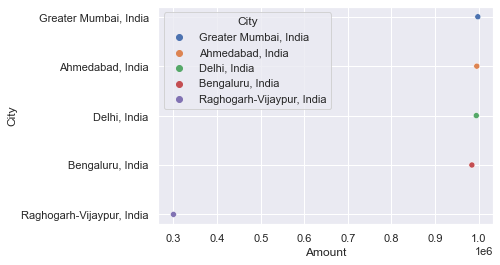

In [22]:
#Top5-cities-2014-chart
sns.scatterplot(x='Amount', y='City', hue='City', data=report1_2014)

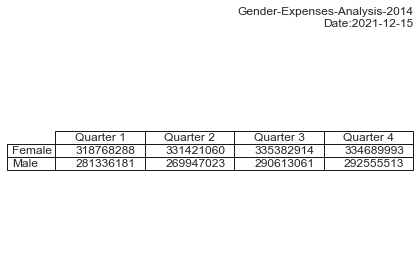

In [23]:
#Quarterly analysis of total amounting transactions for 2014
filt = (df10['Date'] >= '2014') & (df10['Date'] < '2015')
yr14 = df10.loc[filt]
female = yr14.loc[yr14['Gender'] == 'F']
male = yr14.loc[yr14['Gender']=='M']
newm = male.rename(columns={"Amount": "male"})
female.set_index('Date', inplace=True)
newm.set_index('Date', inplace=True)
female['Amount'].resample('Q').sum()
quarterly_ma_14 = newm['male'].resample('Q').sum()
quarterly_fe_14 = female['Amount'].resample('Q').sum()
frames = [quarterly_fe_14, quarterly_ma_14]
pd.concat(frames, axis=1)
#report2_2014
report2_2014 = pd.concat(frames, axis=1)
report2_2014.rename(columns={"Amount": "Female", "male": "Male"})
df15 = report2_2014.rename(columns={"Amount": "Female", "male": "Male"})
df17 = df15.reset_index()
df18 = df17.rename(index = {0:"Quarter 1", 1:"Quarter 2", 2:"Quarter 3", 3:"Quarter 4"}).T
df19 = df18.drop(index=['Date'])
df16 = pd.DataFrame(df19)
fig, ax =plt.subplots(1,1)
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
date = str(datetime.date(datetime.now()))
ax.set_title('Gender-Expenses-Analysis-2014'+'\nDate:'+ date, loc='right')
table = ax.table(cellText=df16.values, rowLabels=df16.index, colLabels=df16.columns, loc='center')
fig.tight_layout()
fig=ax.get_figure()

<AxesSubplot:xlabel='Date'>

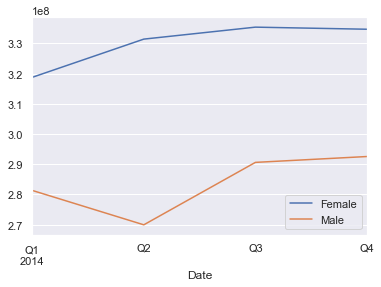

In [24]:
#Gender-Expenses-Analysis-2014-chart
sns.set()
df15.plot()

In [25]:
#Top-3 expenses-analysis-year2(2014)
yr14
rep314 = yr14.sort_values(by='Amount', ascending=False)
rep3_yr14 = rep314.drop_duplicates(subset='Exp Type', keep='first')
report3_2014 = rep3_yr14.head(3)
report3_2014.set_index('Exp Type', inplace=True)
t16 = report3_2014.T
t17 = t16.drop(index=['Date', 'Card Type', 'City', 'Gender'])
t17

Exp Type,Bills,Entertainment,Grocery
Amount,998077,299936,299920


<AxesSubplot:xlabel='Amount', ylabel='Exp Type'>

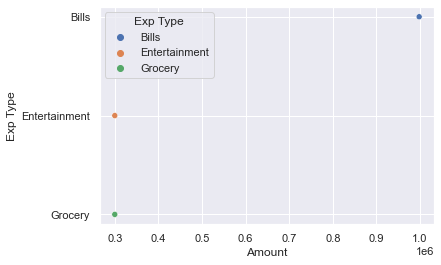

In [26]:
#Top-3 expenses-analysis-year2(2014)-chart
sns.scatterplot(x='Amount', y='Exp Type', hue='Exp Type', data=report3_2014)

<AxesSubplot:xlabel='Date'>

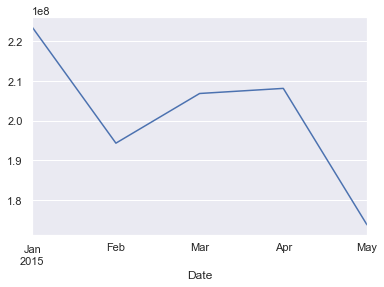

In [27]:
#Analysis of total amounting transactions for year 2015
filt = (df10['Date'] >= '2015')
yr15 = df10.loc[filt]
yr15.set_index('Date', inplace=True)
yr15['Amount'].resample('M').sum()
monthly_yr15 = yr15['Amount'].resample('M').sum()
sns.set()
monthly_yr15.plot()

<AxesSubplot:xlabel='Exp Type', ylabel='Amount'>

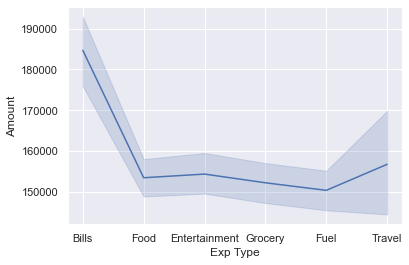

In [28]:
#Expenses analysis for year 2015
filt = (df10['Date'] >= '2015')
yr15 = df10.loc[filt]
sns.lineplot(x='Exp Type', y='Amount', data=yr15)

<AxesSubplot:xlabel='Card Type', ylabel='Amount'>

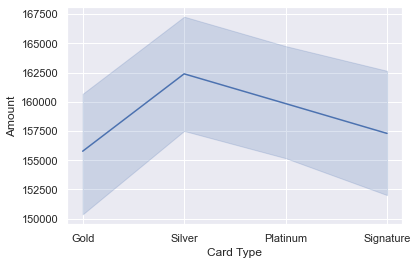

In [29]:
#Transactions analysis by type of card for year 2015
sns.lineplot(x='Card Type', y='Amount', data=yr15)

In [30]:
#Top-5 Cities-expenses-year3(2015)
filt = (df10['Date'] >= '2015')
yr15 = df10.loc[filt]
yr15
rep = yr15.sort_values(by='Amount', ascending=False)
rep1 = rep.drop_duplicates(subset='City', keep='first')
report1_2015 = rep1.head()
report1_2015.set_index('City', inplace=True)
t40 = report1_2015.T
t41 = t40.drop(index=['Date', 'Card Type', 'Exp Type', 'Gender'])
t41


City,"Ahmedabad, India","Bengaluru, India","Greater Mumbai, India","Delhi, India","Dalli-Rajhara, India"
Amount,996291,987935,986379,981404,299906


<AxesSubplot:xlabel='Amount', ylabel='City'>

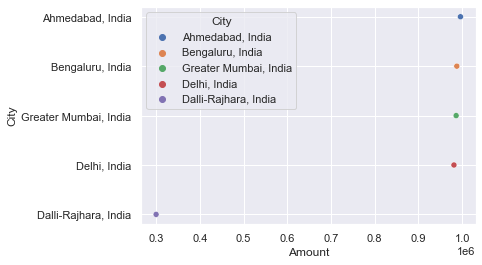

In [31]:
#Top5-cities-2015-chart
sns.scatterplot(x='Amount', y='City', hue='City', data=report1_2015)

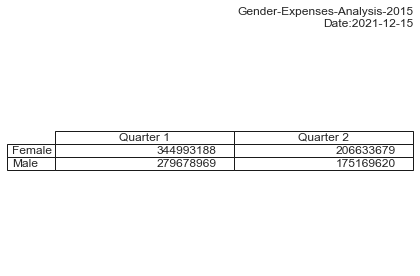

In [32]:
#Quarterly analysis of total amounting transactions for 2015
filt = (df10['Date'] >= '2015')
yr15 = df10.loc[filt]
female15 = yr15.loc[yr15['Gender'] == 'F']
male15 = yr15.loc[yr15['Gender']=='M']
newm15 = male15.rename(columns={"Amount": "male"})
female15.set_index('Date', inplace=True)
newm15.set_index('Date', inplace=True)
female15['Amount'].resample('Q').sum()
quarterly_ma_15 = newm15['male'].resample('Q').sum()
quarterly_fe_15 = female15['Amount'].resample('Q').sum()
frames = [quarterly_fe_15, quarterly_ma_15]
pd.concat(frames, axis=1)
#report2_2014
report2_2015 = pd.concat(frames, axis=1)
report2_2015.rename(columns={"Amount": "Female", "male": "Male"})
df20 = report2_2015.rename(columns={"Amount": "Female", "male": "Male"})
df22 = df20.reset_index()
df23 = df22.rename(index = {0:"Quarter 1", 1:"Quarter 2", 2:"Quarter 3", 3:"Quarter 4"}).T
df24 = df23.drop(index=['Date'])
df21 = pd.DataFrame(df24)
fig, ax =plt.subplots(1,1)
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
date = str(datetime.date(datetime.now()))
ax.set_title('Gender-Expenses-Analysis-2015'+'\nDate:'+ date, loc='right')
table = ax.table(cellText=df21.values, rowLabels=df21.index, colLabels=df21.columns, loc='center')
fig.tight_layout()
fig=ax.get_figure()

<AxesSubplot:xlabel='Date'>

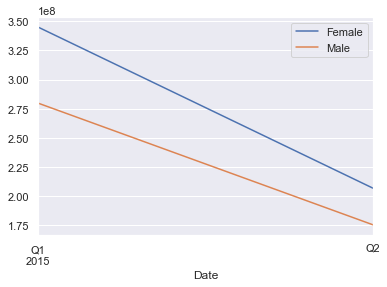

In [33]:
#Gender-Expenses-Analysis-2015-chart
sns.set()
df20.plot()

In [34]:
#Top-3 expenses-analysis-year3(2015)
yr15
rep3 = yr15.sort_values(by='Amount', ascending=False)
rep3_yr15 = rep3.drop_duplicates(subset='Exp Type', keep='first')
report3_2015 = rep3_yr15.head(3)
report3_2015.set_index('Exp Type', inplace=True)
t50 = report3_2015.T
t51 = t50.drop(index=['Date', 'Card Type', 'City', 'Gender'])
t51

Exp Type,Bills,Entertainment,Grocery
Amount,996291,299906,299702


<AxesSubplot:xlabel='Amount', ylabel='Exp Type'>

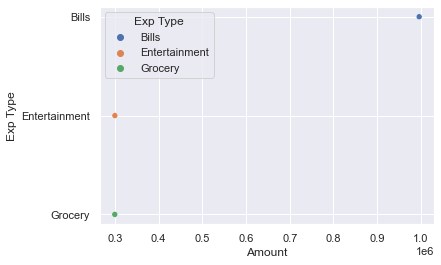

In [35]:
#Top-3 expenses-analysis-year2(2015)-chart
sns.scatterplot(x='Amount', y='Exp Type', hue='Exp Type', data=report3_2015)